In [ ]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
plt.rcParams['axes.unicode_minus'] = False
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정
# pd.read_csv() 함수를 사용해서 데이터를 읽어오는 코드입니다.
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 데이터를 확인하기 위해 head() 함수를 사용합니다.
df.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.011650,0.227429,99.331857,45.532857,127.144714,0.884900,197.276571,57.355429,115.346857,14.631914,1.083857,1.144696,0.367286
std,12.063793,9.170213,12.978702,3.501945,0.427828,0.419202,21.129670,8.820611,73.918492,0.241523,36.306494,14.506945,41.788153,1.540907,0.392051,0.432735,0.482100
min,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.840000,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,96.000000,45.000000,107.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.000000,1.100000,0.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,104.000000,50.000000,161.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.000000,1.380000,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,386.000000,91.000000,999.000000,10.000000,395.000000,157.000000,1340.000000,20.900000,5.000000,5.670000,1.000000


In [ ]:
#시력 2이상,크레아티닌 1.5이상 요단백 4이상

df.loc[df['시력'] > 2, '시력'] = 2.0
df.loc[df['혈청 크레아티닌'] > 1.5, '혈청 크레아티닌'] = 1.5
df.loc[df['요 단백'] > 4, '요 단백'] = 4.0

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
d = df.drop(columns=['ID','label'])

In [7]:
d_set = d.copy()

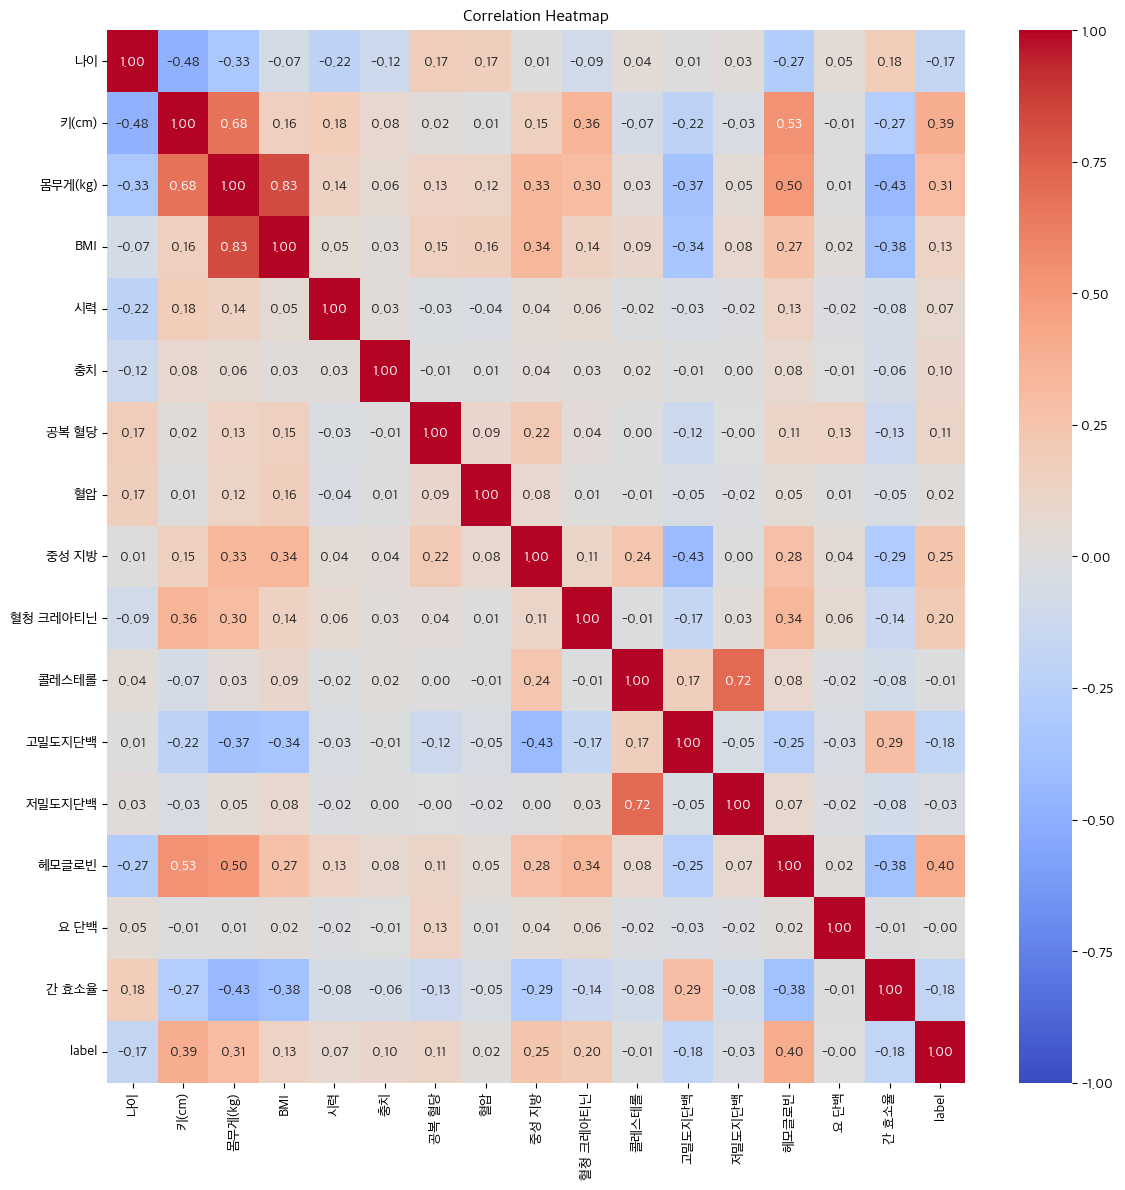

In [10]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV

In [32]:
prams = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True],
    'oob_score': [True],
    'random_state': [42],
    'class_weight': ['balanced'],
    

    
}

In [289]:
X = df.drop(['label','ID','혈청 크레아티닌_신장기능','간효소율_고밀도지단백'], axis = 1)
y = df['label']

x_test = test.drop('ID', axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [277]:
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import mean_squared_error


model= GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=prams,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0,
)

In [278]:
model.fit(X_train, y_train) 


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300], 'oob_score': [True],
                         'random_state': [42]},
             scoring='accuracy')

In [279]:
print("Best params:", model.best_params_)
print("Best CV score:", model.best_score_)

best_model = model.best_estimator_
test_acc = accuracy_score(y_valid, best_model.predict(X_valid))
print("Test Accuracy:", test_acc)

y_pred = best_model.predict(X_valid) 
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(classification_report(y_valid, y_pred))
print(f"RMSE (평균 제곱근 오차): {rmse:.3f}")


Best params: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'oob_score': True, 'random_state': 42}
Best CV score: 0.7282142857142857
Test Accuracy: 0.7492857142857143
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       886
           1       0.63      0.78      0.70       514

    accuracy                           0.75      1400
   macro avg       0.74      0.76      0.74      1400
weighted avg       0.77      0.75      0.75      1400

RMSE (평균 제곱근 오차): 0.501


In [149]:

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정
# pd.read_csv() 함수를 사용해서 데이터를 읽어오는 코드입니다.
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
x_test['중성지방_저밀도지단백'] = x_test['중성 지방'] * x_test['저밀도지단백']

In [339]:
x_test.drop('ID', axis = 1, inplace=True)

In [330]:
X = df.drop(['label','ID','혈청 크레아티닌_신장기능','간효소율_고밀도지단백','간 효소율','고밀도지단백'], axis = 1)
y = df['label']


X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
X

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,저밀도지단백,헤모글로빈,요 단백,중성지방_저밀도지단백
0,35,170,70,24.22,1.10,1,98,40,80,1.3,211,120,15.9,1,114.75
1,40,150,55,24.44,1.00,0,173,39,104,0.6,251,184,11.8,1,66.70
2,60,170,50,17.30,0.75,0,96,40,61,0.8,144,89,15.3,1,44.72
3,40,150,45,20.00,0.50,0,92,40,46,0.7,178,110,13.4,1,77.88
4,55,155,65,27.06,1.00,0,87,42,95,0.9,232,151,13.8,1,81.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,112,14.9,1,66.00
6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,103,14.3,1,94.08
6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,107,15.6,1,54.00
6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,76,14.4,1,49.00


In [340]:
model_1 = RandomForestClassifier(
    n_estimators=50,
    max_depth=100,
    random_state=42,
    class_weight="balanced",
    criterion='gini',
    
)
model_1.fit(X_train, y_train) 
test_acc = accuracy_score(y_valid, model_1.predict(X_valid))
print("Test Accuracy:", test_acc)
y_pred = model_1.predict(X_valid) 
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(classification_report(y_valid, y_pred))
print(f"RMSE (평균 제곱근 오차): {rmse:.3f}")

Test Accuracy: 0.7407142857142858
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       886
           1       0.66      0.59      0.63       514

    accuracy                           0.74      1400
   macro avg       0.72      0.71      0.71      1400
weighted avg       0.74      0.74      0.74      1400

RMSE (평균 제곱근 오차): 0.509


In [342]:
pred = model_1.predict(x_test)
submit = pd.read_csv('sample_submission.csv')
submit['label'] = pred

submit.to_csv('submission.csv', index = False)

In [343]:
submit.head(15)

,ID,label
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
5,TEST_0005,1
6,TEST_0006,0
7,TEST_0007,0
8,TEST_0008,1
9,TEST_0009,0
